# Misophonia Data Analysis 



First, the angle of the jaw and anxiety

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_excel('https://github.com/MMRES-PyBootcamp/MMRES-python-bootcamp2024/raw/master/datasets/misophonia_data.xlsx')
df

,Misofonia,Misofonia.dic,Estado,Estado.dic,ansiedad.rasgo,ansiedad.rasgo.dic,ansiedad.estado,ansiedad.estado.dic,ansiedad.medicada,ansiedad.medicada.dic,depresion,depresion.dic,Sexo,Edad,CLASE,Angulo_convexidad,protusion.mandibular,Angulo_cuelloYtercio,Subnasal_H,cambio.autoconcepto,Misofonia.post,Misofonia.pre,ansiedad.dif
0,si,4.0,divorciado,2.0,99.0,1.0,99.0,1.0,no,0.0,33.65,1.0,M,44.0,III,7.97,13.0,89.6,1.5,1.0,21.0,14.0,0.0
1,si,2.0,casado,1.0,75.0,1.0,75.0,1.0,no,0.0,19.77,0.0,M,43.0,II,18.23,-5.0,107.2,7.3,0.0,14.0,13.0,0.0
2,no,0.0,divorciado,2.0,77.0,1.0,55.0,0.0,no,0.0,29.57,0.0,M,24.0,I,12.27,11.5,101.4,5.0,NaN,NaN,NaN,-22.0
3,si,3.0,casado,1.0,95.0,1.0,99.0,1.0,no,0.0,1.40,0.0,M,33.0,III,7.81,16.8,75.3,2.7,1.0,NaN,NaN,4.0
4,no,0.0,casado,1.0,30.0,0.0,40.0,0.0,no,0.0,5.98,0.0,H,41.0,I,9.81,33.0,105.5,6.0,NaN,NaN,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,15.0,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,12.0,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN


Correlation: -0.3651349573212604


C:\Users\andre\AppData\Local\Temp\ipykernel_8956\2442515903.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope, intercept = model.params[1], model.params[0]
C:\Users\andre\AppData\Local\Temp\ipykernel_8956\2442515903.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]


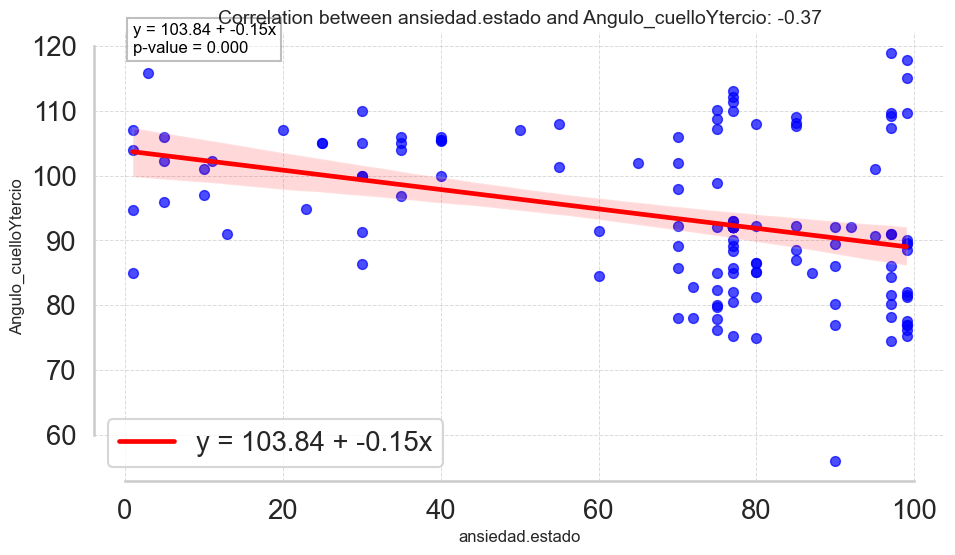

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Calculate the correlation
# Drop rows with NaN or infinite values in the relevant columns
df_clean = df[['ansiedad.estado', 'Angulo_cuelloYtercio']].replace([np.inf, -np.inf], np.nan)
df_clean = df_clean.fillna(df_clean.median())

# Calculate the correlation
correlation = df_clean['ansiedad.estado'].corr(df_clean['Angulo_cuelloYtercio'])
print(f"Correlation: {correlation}")

# Fit a linear regression model
X = sm.add_constant(df_clean['ansiedad.estado'])  # Adds a constant term for the intercept
model = sm.OLS(df_clean['Angulo_cuelloYtercio'], X).fit()
slope, intercept = model.params[1], model.params[0]
p_value = model.pvalues[1]

# Plot the data with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='ansiedad.estado', y='Angulo_cuelloYtercio', data=df_clean, 
            scatter_kws={'s': 50, 'color': 'blue', 'alpha': 0.7}, 
            line_kws={'color': 'red', 'label': f'y = {intercept:.2f} + {slope:.2f}x'})

# Add title and labels
plt.title(f'Correlation between ansiedad.estado and Angulo_cuelloYtercio: {correlation:.2f}', fontsize=14)
plt.xlabel('ansiedad.estado', fontsize=12)
plt.ylabel('Angulo_cuelloYtercio', fontsize=12)

# Annotate the plot with the linear equation and p-value
plt.text(min(df['ansiedad.estado']), max(df['Angulo_cuelloYtercio']), 
         f'y = {intercept:.2f} + {slope:.2f}x\np-value = {p_value:.3f}', 
         fontsize=12, color='black', bbox=dict(facecolor='white', edgecolor='gray', alpha=0.5))

# Customize plot for publication
sns.despine(trim=True)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Show legend and plot and poop
plt.legend()
plt.tight_layout()
plt.show()


c:\Users\andre\miniconda3\envs\MMRES_UPF\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
c:\Users\andre\miniconda3\envs\MMRES_UPF\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 4
  warnings.warn('covariance of constraints does not have full '


                          sum_sq     df          F        PR(>F)
C(Estado)            1282.493508    3.0   0.867746  3.535660e-01
C(CLASE)            40646.338284    2.0  41.252497  3.536007e-14
C(Estado):C(CLASE)   1813.824669    6.0   0.613625  6.536869e-01
Residual            55669.795937  113.0        NaN           NaN


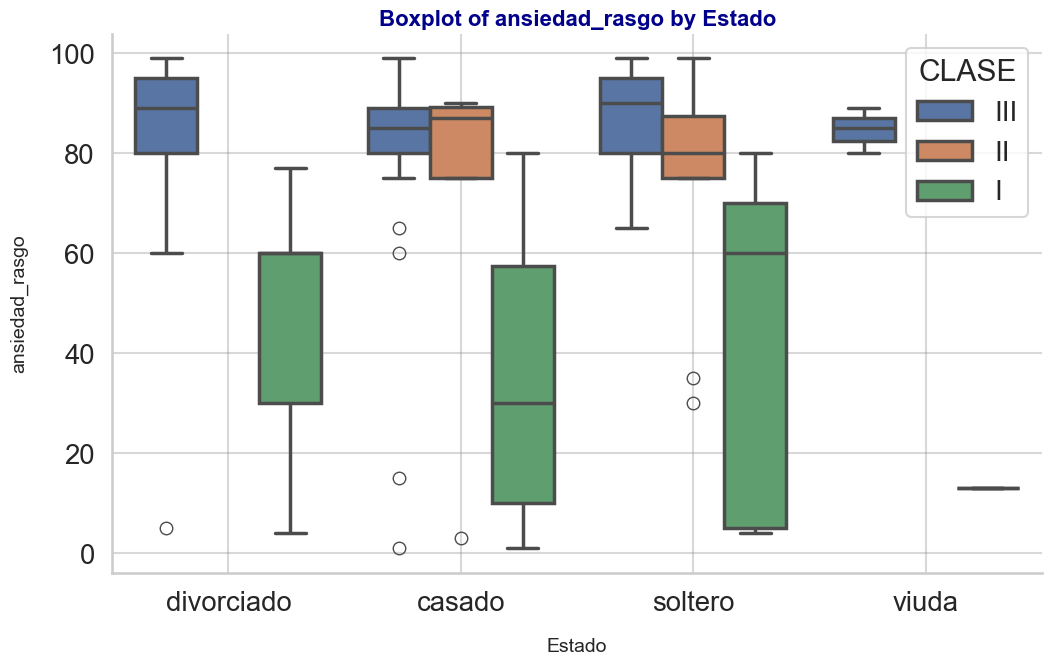

In [12]:
from scipy.stats import f_oneway

# perform lineal model OLS and then ANOVA to compare "ansiedad.rasgo" by "Estado", "depresion.dic" and their synergy
import statsmodels.api as sm
from statsmodels.formula.api import ols

# rename column in df
df.rename(columns={'depresion.dic': 'depresion_binary', "ansiedad.rasgo": "ansiedad_rasgo"}, inplace=True)

# Fit the OLS model
model = ols('ansiedad_rasgo ~ C(Estado) * C(CLASE)', data=df).fit()

# Perform ANOVA
anova_result = sm.stats.anova_lm(model, typ=2)

print(anova_result)

# Set Seaborn theme and context for consistency with previous style
sns.set_theme(style="whitegrid")
sns.set_context("talk", font_scale=1.2)

# Create figure and axis with larger dimensions for clarity
plt.figure(figsize=(12, 7), dpi=100)

# Boxplot with enhanced color palette and dodge parameter
sns.boxplot(x='Estado', y='ansiedad_rasgo', data=df, hue="CLASE", linewidth=2.5, dodge=True)

# Title and labels with enhanced font properties
plt.title('Boxplot of ansiedad_rasgo by Estado', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Estado', fontsize=14, labelpad=15)
plt.ylabel('ansiedad_rasgo', fontsize=14, labelpad=15)

# Lighten grid and remove top/right spines for a cleaner look
plt.grid(True, color='gray', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.show()

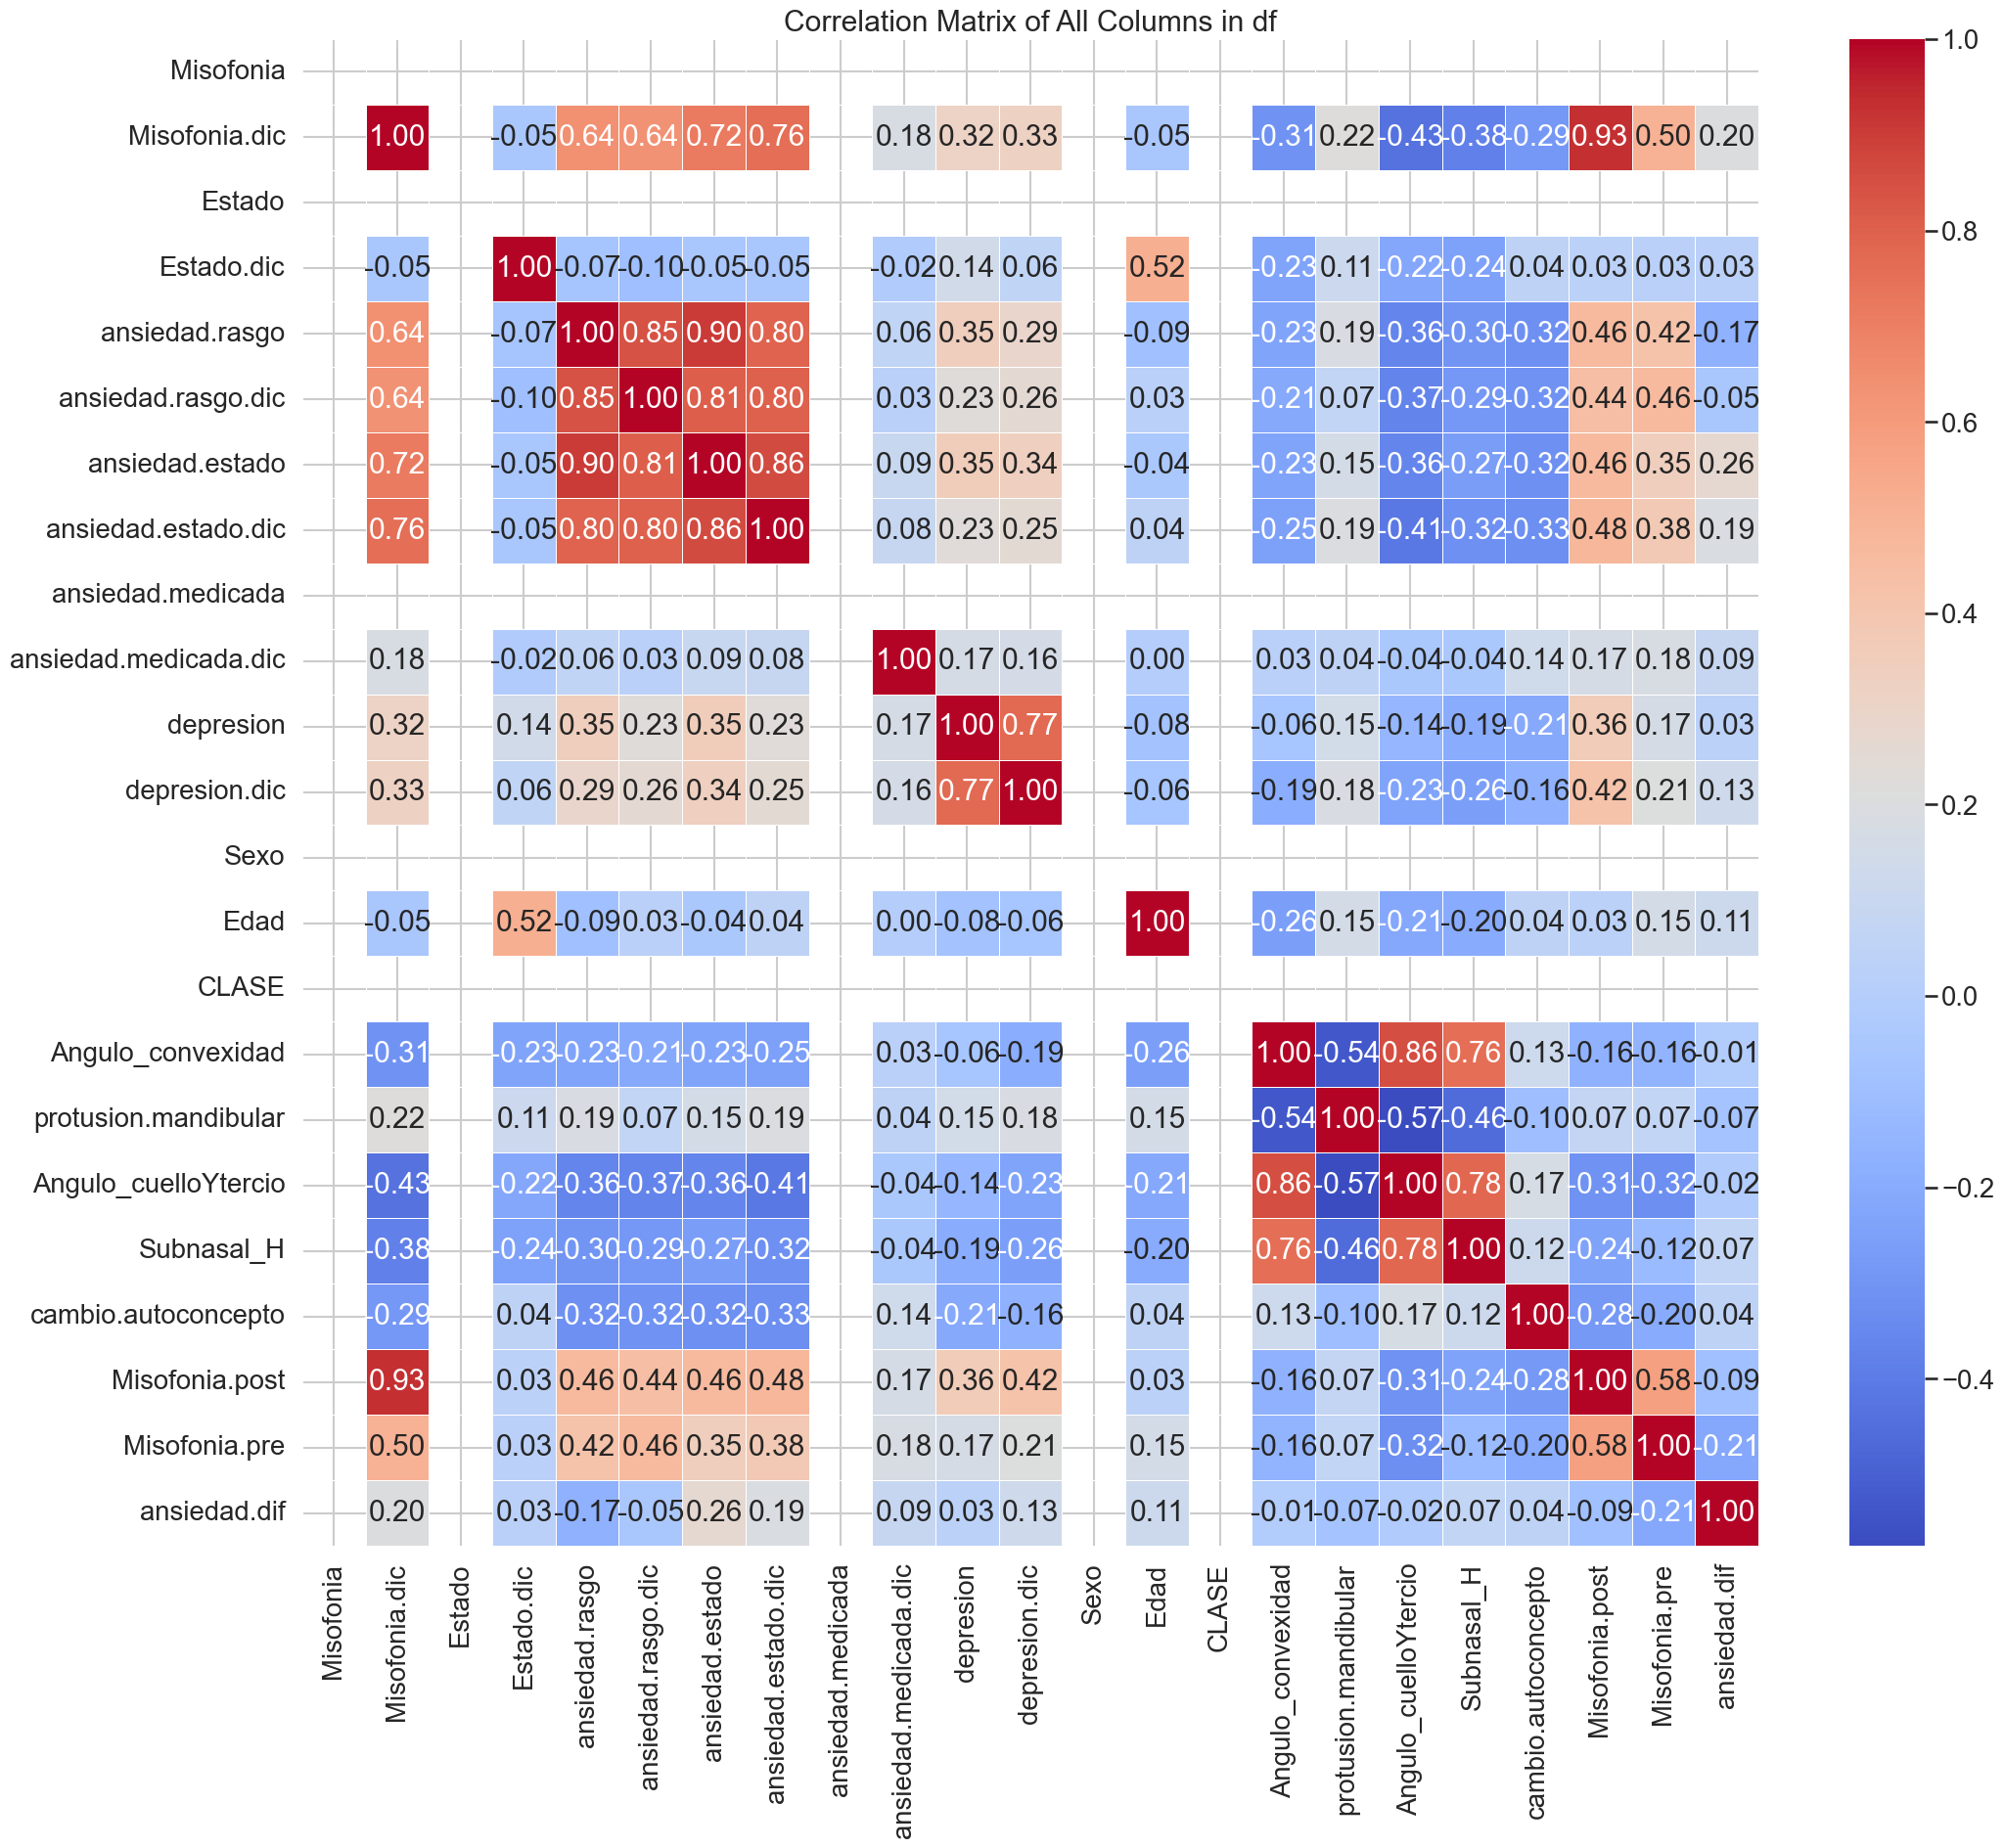

In [4]:
# Convert non-numeric columns to numeric where possible, or drop them
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Display the correlation matrix
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of All Columns in df')
plt.show()

                 sum_sq     df        F        PR(>F)
C(Estado)   7530.426624    3.0  17.5472  1.693131e-09
Residual   17023.053050  119.0      NaN           NaN


C:\Users\andre\AppData\Local\Temp\ipykernel_8956\256009836.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
C:\Users\andre\AppData\Local\Temp\ipykernel_8956\256009836.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Estado', y='Edad', data=df, palette='viridis')


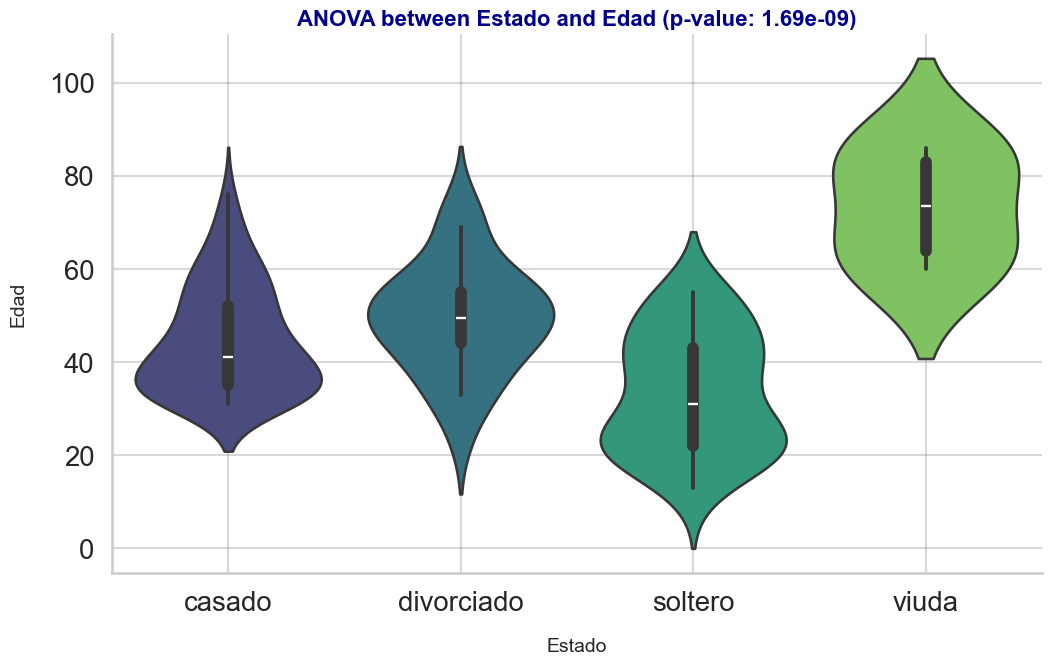

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

# Ensure 'Estado' is categorical
df['Estado'] = df['Estado'].astype('category')

# Fit a linear regression model (OLS)
model = ols('Edad ~ C(Estado)', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Extract the p-value from the model
p_value = anova_table['PR(>F)'][0]

# Set the theme and context for seaborn
sns.set_theme(style="whitegrid")
sns.set_context("talk", font_scale=1.2)

# Create figure and axis with larger dimensions for clarity
plt.figure(figsize=(12, 7), dpi=100)

# Violin plot to visualize distribution of 'Edad' across levels of 'Estado'
sns.violinplot(x='Estado', y='Edad', data=df, palette='viridis')

# Title and labels with enhanced font properties
plt.title(f'ANOVA between Estado and Edad (p-value: {p_value:.2e})', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Estado', fontsize=14, labelpad=15)
plt.ylabel('Edad', fontsize=14, labelpad=15)

# Lighten grid and remove top/right spines for a cleaner look
plt.grid(True, color='gray', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.show()


Correlation: 0.8562753660189637
P-value: 0.0

ANOVA for Angulo_convexidad and misofonia_binary:
                                               sum_sq     df           F  \
C(misofonia_binary)                         31.189953    4.0    1.110805   
Angulo_cuelloYtercio                      1985.623443    1.0  282.865517   
C(misofonia_binary):Angulo_cuelloYtercio    17.770807    4.0    0.632893   
Residual                                   793.223054  113.0         NaN   

                                                PR(>F)  
C(misofonia_binary)                       3.550135e-01  
Angulo_cuelloYtercio                      1.525515e-32  
C(misofonia_binary):Angulo_cuelloYtercio  6.400490e-01  
Residual                                           NaN  

ANOVA for Angulo_cuelloYtercio and misofonia_binary:
                                             sum_sq     df           F  \
C(misofonia_binary)                      731.874876    4.0    5.702612   
Angulo_convexidad                   

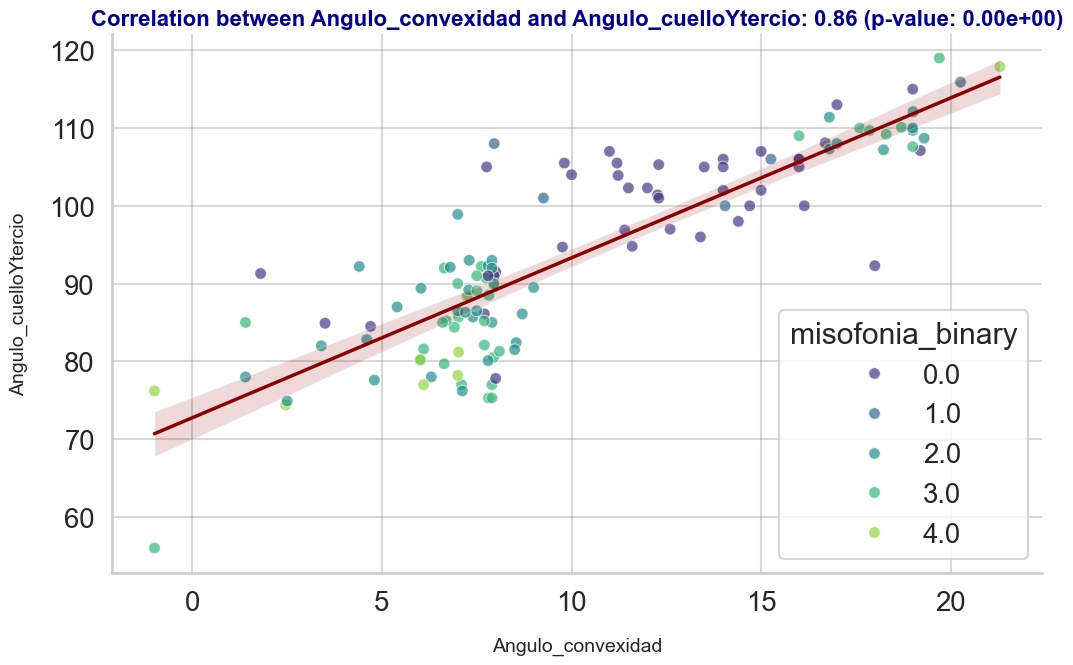

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Convert Misofonia.dic to a categorical value
df_clean = df
df_clean['Misofonia.dic'] = df_clean['Misofonia.dic'].astype('category')

# Rename Misofonia.dic for Misofonia_binary
df_clean.rename(columns={'Misofonia.dic': 'misofonia_binary'}, inplace=True)

# Calculate the correlation between Angulo_convexidad and Angulo_cuelloYtercio
correlation = df_clean['Angulo_convexidad'].corr(df_clean['Angulo_cuelloYtercio'])
print(f"Correlation: {correlation}")

# Compute the p-value for the correlation
n = df_clean[['Angulo_convexidad', 'Angulo_cuelloYtercio']].dropna().shape[0]
t_stat = correlation * np.sqrt((n - 2) / (1 - correlation**2))
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))
print(f"P-value: {p_value}")

# ANOVA for Angulo_convexidad and misofonia_binary
model_convexidad = ols('Angulo_convexidad ~ C(misofonia_binary)*(Angulo_cuelloYtercio)', data=df_clean).fit()
anova_table_convexidad = sm.stats.anova_lm(model_convexidad, typ=2)
print("\nANOVA for Angulo_convexidad and misofonia_binary:")
print(anova_table_convexidad)

# ANOVA for Angulo_cuelloYtercio and misofonia_binary
model_cuelloYtercio = ols('Angulo_cuelloYtercio ~ C(misofonia_binary)*(Angulo_convexidad)', data=df_clean).fit()
anova_table_cuelloYtercio = sm.stats.anova_lm(model_cuelloYtercio, typ=2)
print("\nANOVA for Angulo_cuelloYtercio and misofonia_binary:")
print(anova_table_cuelloYtercio)

# Create figure and axis with larger dimensions for clarity
plt.figure(figsize=(12, 7), dpi=100)

# Scatterplot with regression line and hue
sns.scatterplot(x='Angulo_convexidad', y='Angulo_cuelloYtercio', hue='misofonia_binary', data=df_clean, 
                palette='viridis', s=70, alpha=0.7)
sns.regplot(x='Angulo_convexidad', y='Angulo_cuelloYtercio', data=df_clean, 
            scatter=False, line_kws={'color': 'darkred', 'lw': 2.5})  # Adjust regression line style

# Title and labels with enhanced font properties
plt.title(f'Correlation between Angulo_convexidad and Angulo_cuelloYtercio: {correlation:.2f} (p-value: {p_value:.2e})',
          fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Angulo_convexidad', fontsize=14, labelpad=15)
plt.ylabel('Angulo_cuelloYtercio', fontsize=14, labelpad=15)

# Lighten grid and remove top/right spines for a cleaner look
plt.grid(True, color='gray', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.show()


In [34]:
import plotly.graph_objects as go

# Assume there's a third variable (Z_variable) to plot in 3D
Z_variable = df_clean['misofonia_binary']

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=df_clean['Angulo_convexidad'],  # X-axis is now Angulo_convexidad
    y=df_clean['Angulo_cuelloYtercio'],  # Y-axis is now Angulocabezaycuello
    z=Z_variable,
    mode='markers',
    marker=dict(
        size=8,
        color=df_clean['misofonia_binary'].cat.codes,  # Color by misofonia_binary categories
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(title='misofonia_binary')
    ),
    text=df_clean['misofonia_binary'],  # Show misofonia_binary on hover
)])

# Set titles and axis labels
fig.update_layout(
    title=f'3D Interactive Plot: Angulo_convexidad, Angulocabezaycuello, and Misofonia.dic',
    scene=dict(
        xaxis_title='Angulo_convexidad',  # Update X-axis label
        yaxis_title='Angulo_cuelloYtercio',  # Update Y-axis label
        zaxis_title='Misofonia.dic'
    ),
    margin=dict(l=0, r=0, b=0, t=40),
)

# Show the interactive plot
fig.show()


In [7]:
# Depression Vulnerability Index (DVI)
df_expanded = df.copy()
df_expanded['DVI'] = df['depresion']**2/(df['ansiedad.estado']*df['ansiedad.rasgo'])
# Calculate the golden ratio of the face shape
df_expanded['Golden_Ratio'] = (df['Angulo_convexidad'] + df['protusion.mandibular'] + df['Subnasal_H']) / df['Angulo_cuelloYtercio']


In [8]:
def compute_golden_ratio(convexity_angle, mandibular_protrusion, neck_angle, subnasal_distance):
    # Ratios we want to compare with the golden ratio
    golden_ratio = 1.618
    
    # Calculate ratios
    ratio1 = subnasal_distance / mandibular_protrusion  # example vertical ratio
    ratio2 = convexity_angle / mandibular_protrusion    # facial structure symmetry
    
    # Compute closeness to golden ratio
    diff1 = abs(golden_ratio - ratio1)
    diff2 = abs(golden_ratio - ratio2)
    
    # Average of the differences (a closer score to 0 indicates proximity to the golden ratio)
    average_diff = (diff1 + diff2) / 2
    
    return {
        'ratio1': ratio1, 
        'ratio2': ratio2, 
        'average_diff_from_golden_ratio': average_diff
    }



df_expanded["Golden_Ratio"] = compute_golden_ratio(df["Angulo_convexidad"], df["protusion.mandibular"], df["Angulo_cuelloYtercio"], df["Subnasal_H"])["average_diff_from_golden_ratio"]
df_expanded

,Misofonia,Misofonia.dic,Estado,Estado.dic,ansiedad.rasgo,ansiedad.rasgo.dic,ansiedad.estado,ansiedad.estado.dic,ansiedad.medicada,ansiedad.medicada.dic,depresion,depresion.dic,Sexo,Edad,CLASE,Angulo_convexidad,protusion.mandibular,Angulo_cuelloYtercio,Subnasal_H,cambio.autoconcepto,Misofonia.post,Misofonia.pre,ansiedad.dif,DVI,Golden_Ratio
0,si,4.0,divorciado,2.0,99.0,1.0,99.0,1.0,no,0.0,33.65,1.0,M,44.0,III,7.97,13.0,89.6,1.5,1.0,21.0,14.0,0.0,0.115531,1.253769
1,si,2.0,casado,1.0,75.0,1.0,75.0,1.0,no,0.0,19.77,0.0,M,43.0,II,18.23,-5.0,107.2,7.3,0.0,14.0,13.0,0.0,0.069485,4.171000
2,no,0.0,divorciado,2.0,77.0,1.0,55.0,0.0,no,0.0,29.57,0.0,M,24.0,I,12.27,11.5,101.4,5.0,NaN,NaN,NaN,-22.0,0.206466,0.867130
3,si,3.0,casado,1.0,95.0,1.0,99.0,1.0,no,0.0,1.40,0.0,M,33.0,III,7.81,16.8,75.3,2.7,1.0,NaN,NaN,4.0,0.000208,1.305202
4,no,0.0,casado,1.0,30.0,0.0,40.0,0.0,no,0.0,5.98,0.0,H,41.0,I,9.81,33.0,105.5,6.0,NaN,NaN,NaN,10.0,0.029800,1.378455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,15.0,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,12.0,NaN,NaN,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN,NaN,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN,NaN


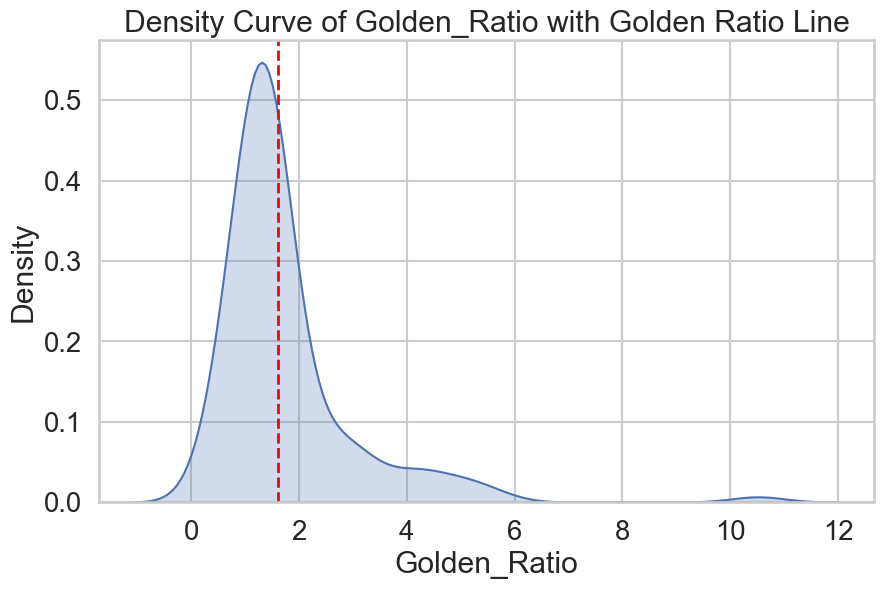

In [36]:
# Plot a density curve following a normal distribution of df_expanded column named Golden_Ratio
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_expanded, x='Golden_Ratio', fill=True)

# Draw an x-axis line at 1.618 (Golden Ratio)
plt.axvline(x=1.618, color='red', linestyle='--', linewidth=2)

# Add title and labels
plt.title('Density Curve of Golden_Ratio with Golden Ratio Line')
plt.xlabel('Golden_Ratio')
plt.ylabel('Density')

# Show plot
plt.show()

In [24]:
from scipy.stats import shapiro

# Run the Shapiro-Wilk test for normality
stat, p_value = shapiro(df_expanded['Golden_Ratio'].values, nan_policy='omit')

print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("The Golden_Ratio column follows a normal distribution (fail to reject H0)")
else:
    print("The Golden_Ratio column does not follow a normal distribution (reject H0)")

Shapiro-Wilk Test Statistic: nan
P-value: 1.0
The Golden_Ratio column follows a normal distribution (fail to reject H0)


Clustering Analysis

In [10]:
df

,Misofonia,Misofonia.dic,Estado,Estado.dic,ansiedad.rasgo,ansiedad.rasgo.dic,ansiedad.estado,ansiedad.estado.dic,ansiedad.medicada,ansiedad.medicada.dic,depresion,depresion.dic,Sexo,Edad,CLASE,Angulo_convexidad,protusion.mandibular,Angulo_cuelloYtercio,Subnasal_H,cambio.autoconcepto,Misofonia.post,Misofonia.pre,ansiedad.dif
0,si,4.0,divorciado,2.0,99.0,1.0,99.0,1.0,no,0.0,33.65,1.0,M,44.0,III,7.97,13.0,89.6,1.5,1.0,21.0,14.0,0.0
1,si,2.0,casado,1.0,75.0,1.0,75.0,1.0,no,0.0,19.77,0.0,M,43.0,II,18.23,-5.0,107.2,7.3,0.0,14.0,13.0,0.0
2,no,0.0,divorciado,2.0,77.0,1.0,55.0,0.0,no,0.0,29.57,0.0,M,24.0,I,12.27,11.5,101.4,5.0,NaN,NaN,NaN,-22.0
3,si,3.0,casado,1.0,95.0,1.0,99.0,1.0,no,0.0,1.40,0.0,M,33.0,III,7.81,16.8,75.3,2.7,1.0,NaN,NaN,4.0
4,no,0.0,casado,1.0,30.0,0.0,40.0,0.0,no,0.0,5.98,0.0,H,41.0,I,9.81,33.0,105.5,6.0,NaN,NaN,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,15.0,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,12.0,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN


In [11]:
df.columns

Index(['Misofonia', 'Misofonia.dic', 'Estado', 'Estado.dic', 'ansiedad.rasgo',
       'ansiedad.rasgo.dic', 'ansiedad.estado', 'ansiedad.estado.dic',
       'ansiedad.medicada', 'ansiedad.medicada.dic', 'depresion',
       'depresion.dic', 'Sexo', 'Edad', 'CLASE', 'Angulo_convexidad',
       'protusion.mandibular', 'Angulo_cuelloYtercio', 'Subnasal_H',
       'cambio.autoconcepto', 'Misofonia.post', 'Misofonia.pre',
       'ansiedad.dif'],
      dtype='object')

In [12]:
df_tidy = df_expanded.drop(columns=['Misofonia', "Misofonia.dic",'Estado', 'ansiedad.medicada',"ansiedad.dif","depresion","ansiedad.rasgo","ansiedad.estado"])
# encode the categoial variables Sexo and CLASE to numeric
df_tidy = pd.get_dummies(df_tidy, columns=['Sexo', 'CLASE'], drop_first=True)
# fill NaN values with the median of the column
df_tidy = df_tidy.fillna(df_tidy.median())




In [13]:
df_tidy


,Estado.dic,ansiedad.rasgo.dic,ansiedad.estado.dic,ansiedad.medicada.dic,depresion.dic,Edad,Angulo_convexidad,protusion.mandibular,Angulo_cuelloYtercio,Subnasal_H,cambio.autoconcepto,Misofonia.post,Misofonia.pre,DVI,Golden_Ratio,Sexo_M,CLASE_II,CLASE_III
0,2.0,1.0,1.0,0.0,1.0,44.0,7.97,13.0,89.6,1.5,1.0,21.0,14.0,0.115531,1.253769,True,False,True
1,1.0,1.0,1.0,0.0,0.0,43.0,18.23,-5.0,107.2,7.3,0.0,14.0,13.0,0.069485,4.171000,True,True,False
2,2.0,1.0,0.0,0.0,0.0,24.0,12.27,11.5,101.4,5.0,1.0,14.0,13.0,0.206466,0.867130,True,False,False
3,1.0,1.0,1.0,0.0,0.0,33.0,7.81,16.8,75.3,2.7,1.0,14.0,13.0,0.000208,1.305202,True,False,True
4,1.0,0.0,0.0,0.0,0.0,41.0,9.81,33.0,105.5,6.0,1.0,14.0,13.0,0.029800,1.378455,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1.0,1.0,1.0,0.0,0.0,43.0,7.96,12.2,92.0,2.9,1.0,17.0,15.0,0.069485,1.415368,False,False,False
134,1.0,1.0,1.0,0.0,0.0,43.0,7.96,12.2,92.0,2.9,1.0,21.0,12.0,0.069485,1.415368,False,False,False
135,1.0,1.0,1.0,0.0,0.0,43.0,7.96,12.2,92.0,2.9,1.0,18.0,18.0,0.069485,1.415368,False,False,False
136,1.0,1.0,1.0,0.0,0.0,43.0,7.96,12.2,92.0,2.9,1.0,14.0,14.0,0.069485,1.415368,False,False,False


In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
df_tidy_scaled = scaler.fit_transform(df_tidy)

# Perform PCA
pca = PCA(n_components=2)  # You can change the number of components
principal_components = pca.fit_transform(df_tidy_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])



# Plot the PCA result
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue=df['Misofonia.dic'], data=df_pca, palette='viridis', s=70, alpha=0.7)
plt.title('PCA of df_tidy')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, color='gray', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

ValueError: Input X contains infinity or a value too large for dtype('float64').

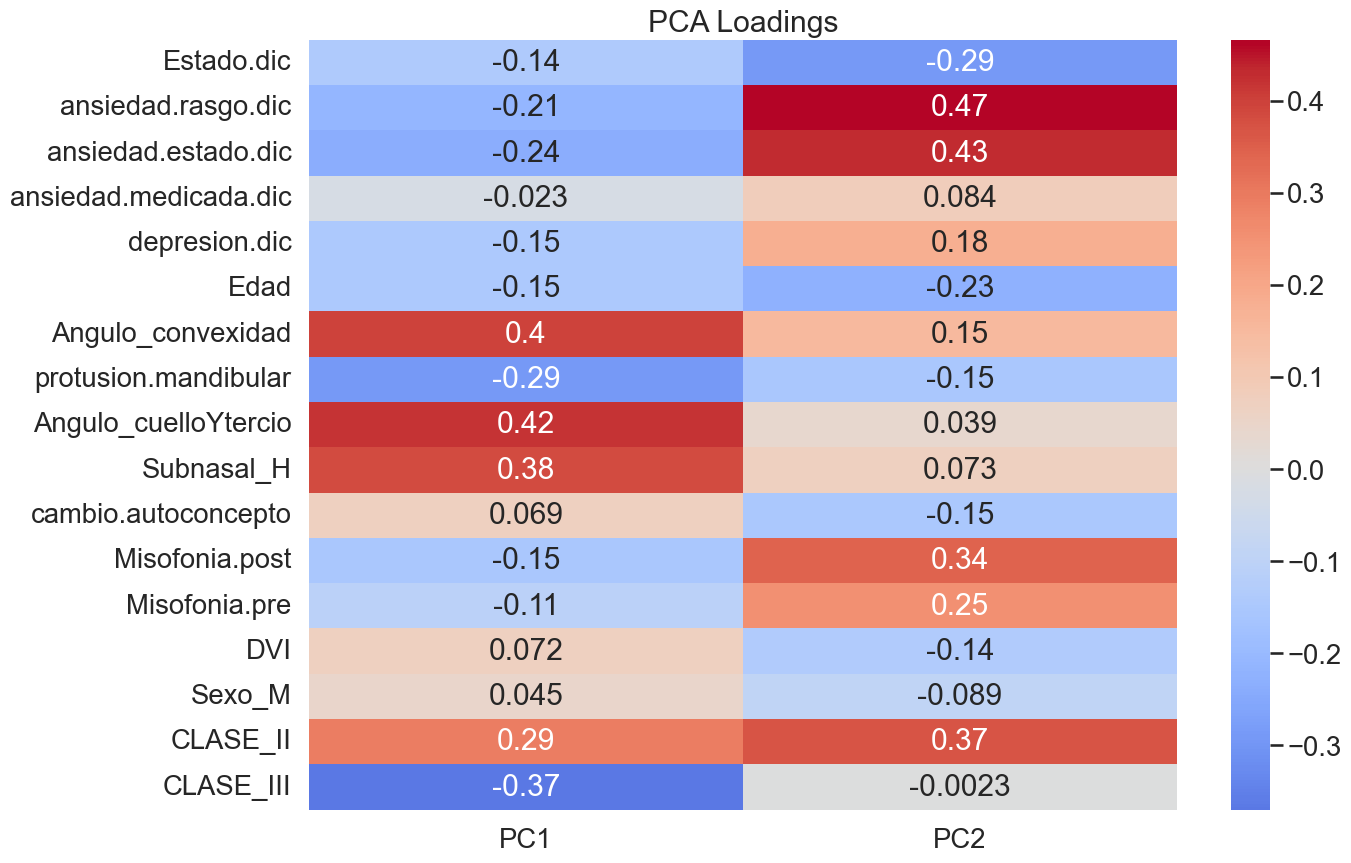

In [67]:
# Extract the loadings (components)
loadings = pca.components_.T

# Create a DataFrame for better visualization
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=df_tidy.columns)

# Plot the loadings
plt.figure(figsize=(14, 10))  # Increase the figure size
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Loadings')
plt.show()

Random Forest Model for Predicting Depresion

In [70]:
# Separate training and test set
np.random.seed(42)
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_tidy, test_size=0.2, random_state=42)
train_set_ready=train_set.drop(["depresion","depresion.dic"], axis=1)
train_set_labels=train_set["depresion"].copy()

In [72]:
from sklearn.metrics import mean_squared_error
X_test = test_set.drop(["depresion","depresion.dic"], axis=1)
y_test = test_set["depresion"].copy()


In [73]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint, uniform
from sklearn.metrics import mean_squared_error
from scipy import stats

# Step 1: Defining the hyperparameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(100, 500),  # Number of trees in the forest
    'max_features': [5,10,15,20],  # Number of features to consider at each split
    'max_depth': randint(10, 50),  # Maximum depth of the tree
    'min_samples_split': randint(2, 10),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 10),  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],  # Use bootstrap samples when building trees
}

# Step 2: Setting up the RandomForest model and the RandomizedSearchCV
forest_reg = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(forest_reg, param_distributions,
                                   n_iter=100, cv=5, scoring='neg_mean_squared_error', 
                                   verbose=1, random_state=42, n_jobs=-1)

# Step 3: Fitting the RandomizedSearchCV model to the data
random_search.fit(train_set_ready, train_set_labels)




Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002B6CB760E60>,
                                        'max_features': [5, 10, 15, 20],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002B6CB767290>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002B6C707CFE0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002B6CB73F110>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

c:\Users\andre\miniconda3\envs\MMRES_UPF\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Final RMSE: 9.57246327619935


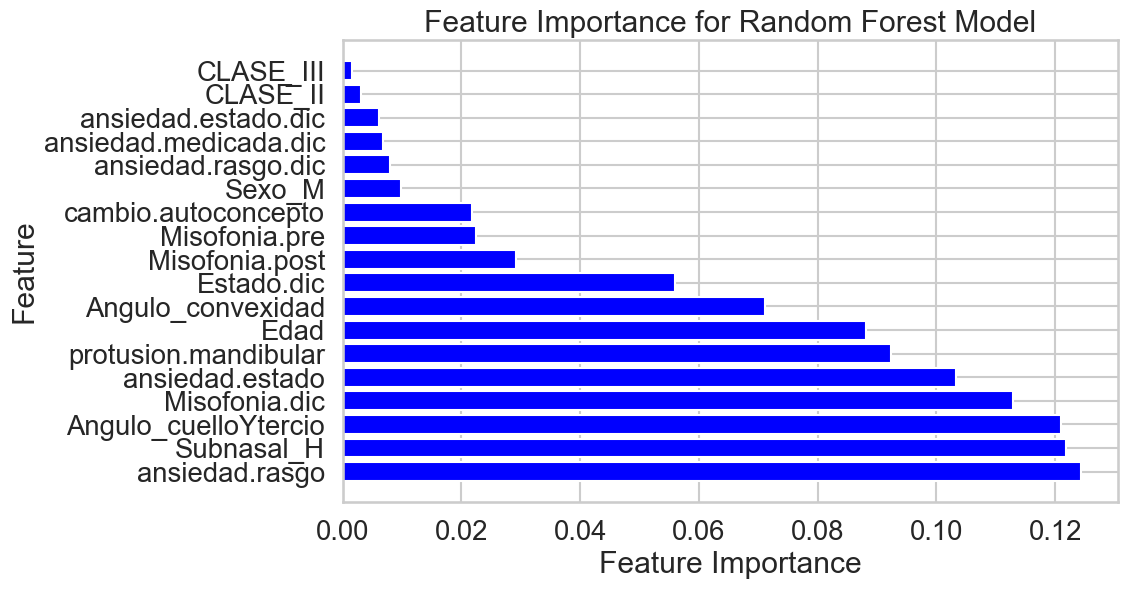

In [74]:
# Step 4: Evaluating the model performance on the test set
final_model = random_search.best_estimator_

final_predictions = final_model.predict(X_test)
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)

print(f"Final RMSE: {final_rmse}")

# Step 5: Displaying feature importance for potential feature selection
importances = final_model.feature_importances_

# Creating a DataFrame for better visualization
features_importance_df = pd.DataFrame({
    'Feature': train_set_ready.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Step 6: Plot feature importance (optional for visual)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(features_importance_df['Feature'], features_importance_df['Importance'], color='blue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Model')
plt.show()

In [75]:


confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([ 6.18200283, 12.0435438 ])

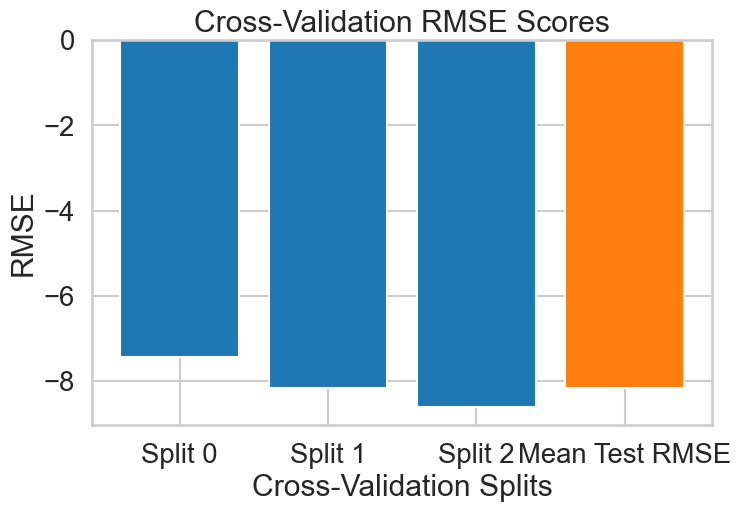

In [76]:
import matplotlib.pyplot as plt

# Cross-validation scores
splits = ['Split 0', 'Split 1', 'Split 2', 'Mean Test RMSE']
rmse_scores = [-cv_res['split0'].mean(), -cv_res['split1'].mean(), -cv_res['split2'].mean(), -cv_res['mean_test_rmse'].mean()]

plt.figure(figsize=(8, 5))
plt.bar(splits, rmse_scores, color=['#1f77b4', '#1f77b4', '#1f77b4', '#ff7f0e'])
plt.xlabel('Cross-Validation Splits')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Scores')
plt.show()


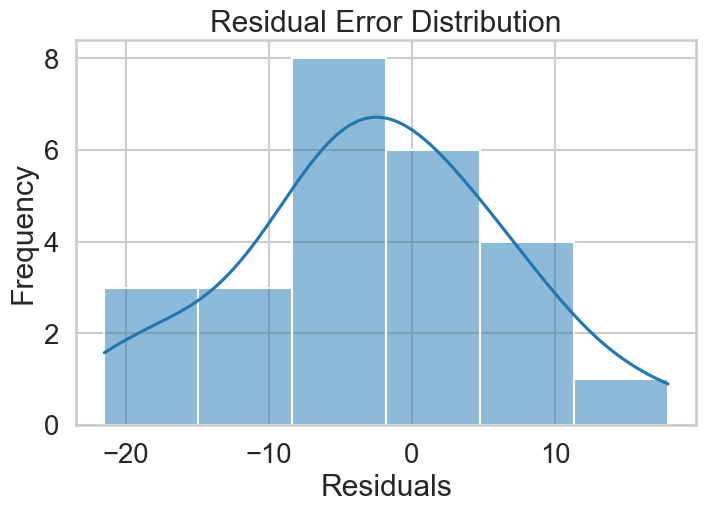

In [77]:
import seaborn as sns

# Residuals
residuals = final_predictions - y_test

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='#1f77b4')
plt.title('Residual Error Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [80]:
# compare the RMSE of the model with the range of the target variable
print(f"RMSE: {final_rmse}")
print(f"Range of the target variable: {df['depresion'].max() - df['depresion'].min()}")
print(f"RMSE as a percentage of the range: {final_rmse / (df['depresion'].max() - df['depresion'].min()) * 100:.2f}%")



RMSE: 9.57246327619935
Range of the target variable: 43.75
RMSE as a percentage of the range: 21.88%
